# Project Name ----> BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# What is a Term Deposit?

A term deposit is a deposit that a bank or financial institution offers with a fixed rate(often better than just opening
deposit account) in which your money will be returned back at a specific maturity time.For more information please click
that link:https://www.investopedia.com/terms/t/termdeposit.asp

# About the Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not

# Dataset Attributes

# Here is the description of all the variables:

Attribute Information

1 Variable: Definition

2 ID: Unique client ID

3 age: Age of the client

4 job: Type of job

5 marital: Marital status of the client

6 education: Education level

7 default: Credit in default.

8 housing: Housing loan

9 loan: Personal loan

10 contact: Type of communication

11 month: Contact month

12 day_of_week: Day of week of contact

13 duration: Contact duration

14 campaign: number of contacts performed during this campaign to the client

15 pdays: number of days that passed by after the client was last contacted

16 previous: number of contacts performed before this campaign

17 poutcome: outcome of the previous marketing campaign


# Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv('Termdeposit.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#Checking the top 5 rows
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
#Bottom 5 rows
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
#to check coulmns names,here we get the coulmns name and the datatype
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
#To check the shape of dataset
df.shape

(31647, 18)

We have 31647 rows and 18 columns in the dataset

In [7]:
#Check info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In the data set memory usage is more than 4.3MB and we have object/integer datatype columns in the dataset

In [8]:
#Checking the value count in each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

# Exploratory Data Analysis

In [9]:
#Now checking for null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

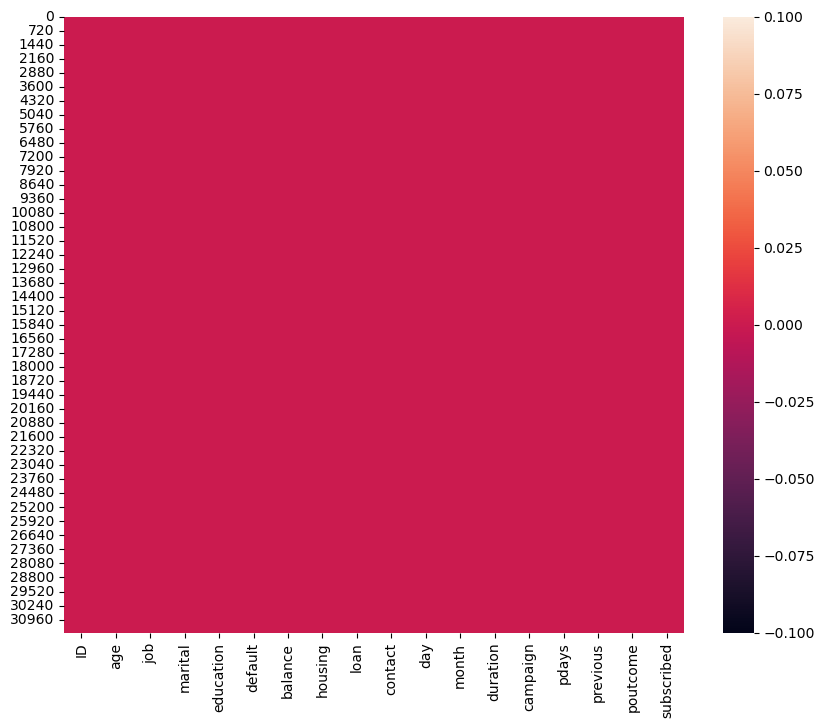

In [10]:
#Checking the null values with help of heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [11]:
#Checking for the duplicated values
df.duplicated().sum()

0

In [12]:
#Check no of unique values in each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


There are two columns ID and balance which have most unique values so we can drop these columns

In [13]:
df.drop(columns=['ID','balance'],axis=1,inplace=True)

In [14]:
#Now we separate numerical or categorical data separately
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("The catefgorical column is:",categorical_col)
print('/n')
#for numerical column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("The numerical column is:",numerical_col)

The catefgorical column is: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
/n
The numerical column is: ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
#Checking the statistical summary of the dataset
df.describe()

,age,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Visualization

# univariate analysis

no     27932
yes     3715
Name: subscribed, dtype: int64


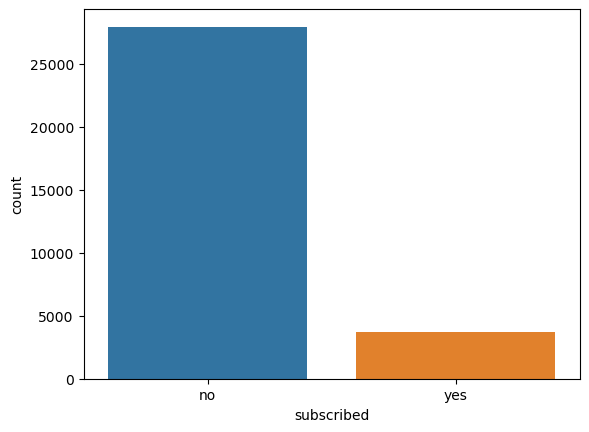

In [16]:
#Visualize the number of customer who subscribed fixed deposit
ax=sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


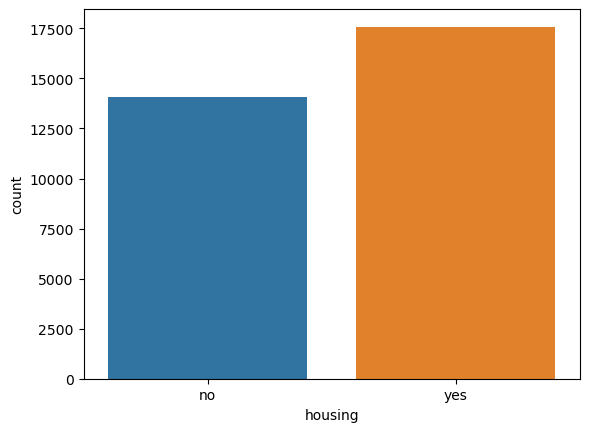

In [17]:
#Visualize the count of housing loan
ax=sns.countplot(x='housing',data=df)
print(df['housing'].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


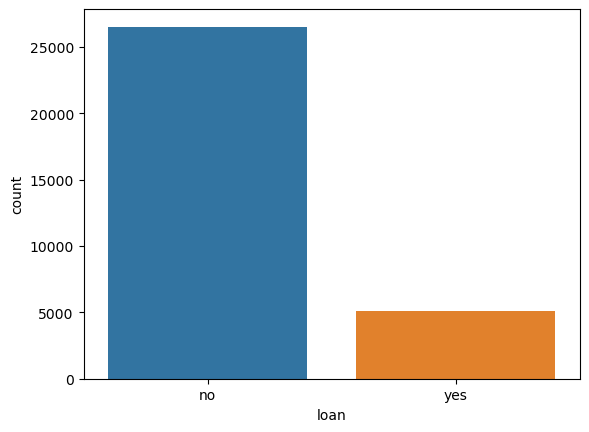

In [18]:
#Visualize the count of personal loan
ax=sns.countplot(x='loan',data=df)
print(df['loan'].value_counts())

no     31062
yes      585
Name: default, dtype: int64


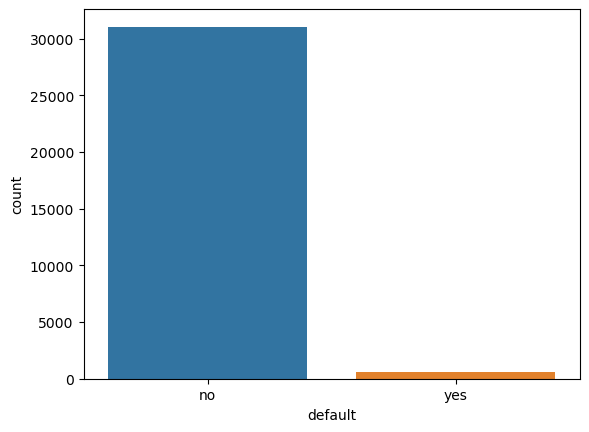

In [19]:
#visualizing the count of deaulter
ax=sns.countplot(x='default',data=df)
print(df['default'].value_counts())

age            AxesSubplot(0.125,0.53;0.110714x0.35)
day         AxesSubplot(0.257857,0.53;0.110714x0.35)
duration    AxesSubplot(0.390714,0.53;0.110714x0.35)
campaign    AxesSubplot(0.523571,0.53;0.110714x0.35)
pdays       AxesSubplot(0.656429,0.53;0.110714x0.35)
previous    AxesSubplot(0.789286,0.53;0.110714x0.35)
dtype: object

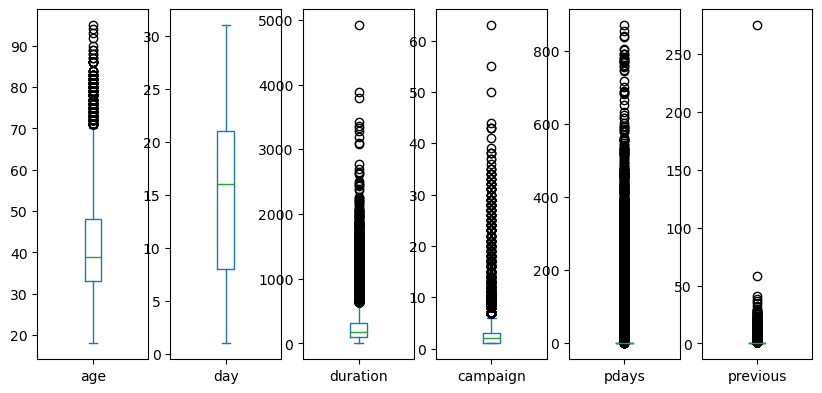

In [20]:
#Checking for outliers using the boxplot
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,yes,no,telephone,15,may,22,7,337,12,failure,no


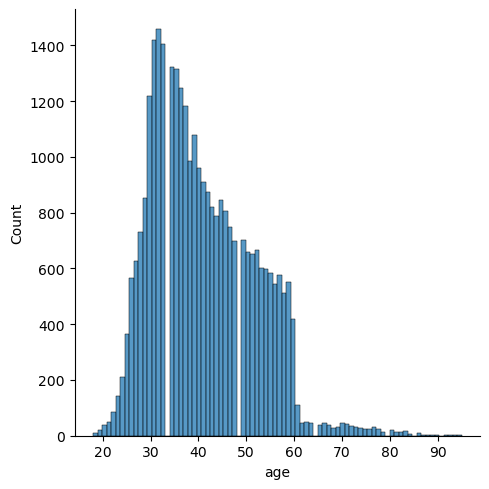

In [22]:
sns.displot(df['age'])

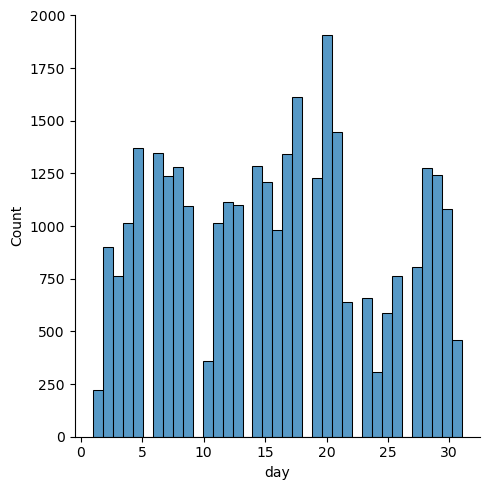

In [23]:
sns.displot(df['day'])

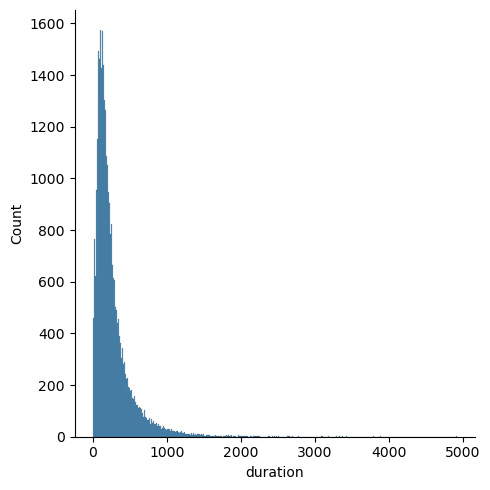

In [24]:
sns.displot(df['duration'])

In [25]:
import warnings
warnings.filterwarnings('ignore')
df.skew()

age          0.681607
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

# Removing Skewness

In [26]:
df['duration']=np.cbrt(df['duration'])

In [27]:
df['campaign']=np.cbrt(df['campaign'])

In [28]:
df['pdays']=np.cbrt(df['pdays'])

In [29]:
df['previous']=np.cbrt(df['previous'])

In [30]:
#Again checking the skewness
df.skew()

age         0.681607
day         0.087185
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64

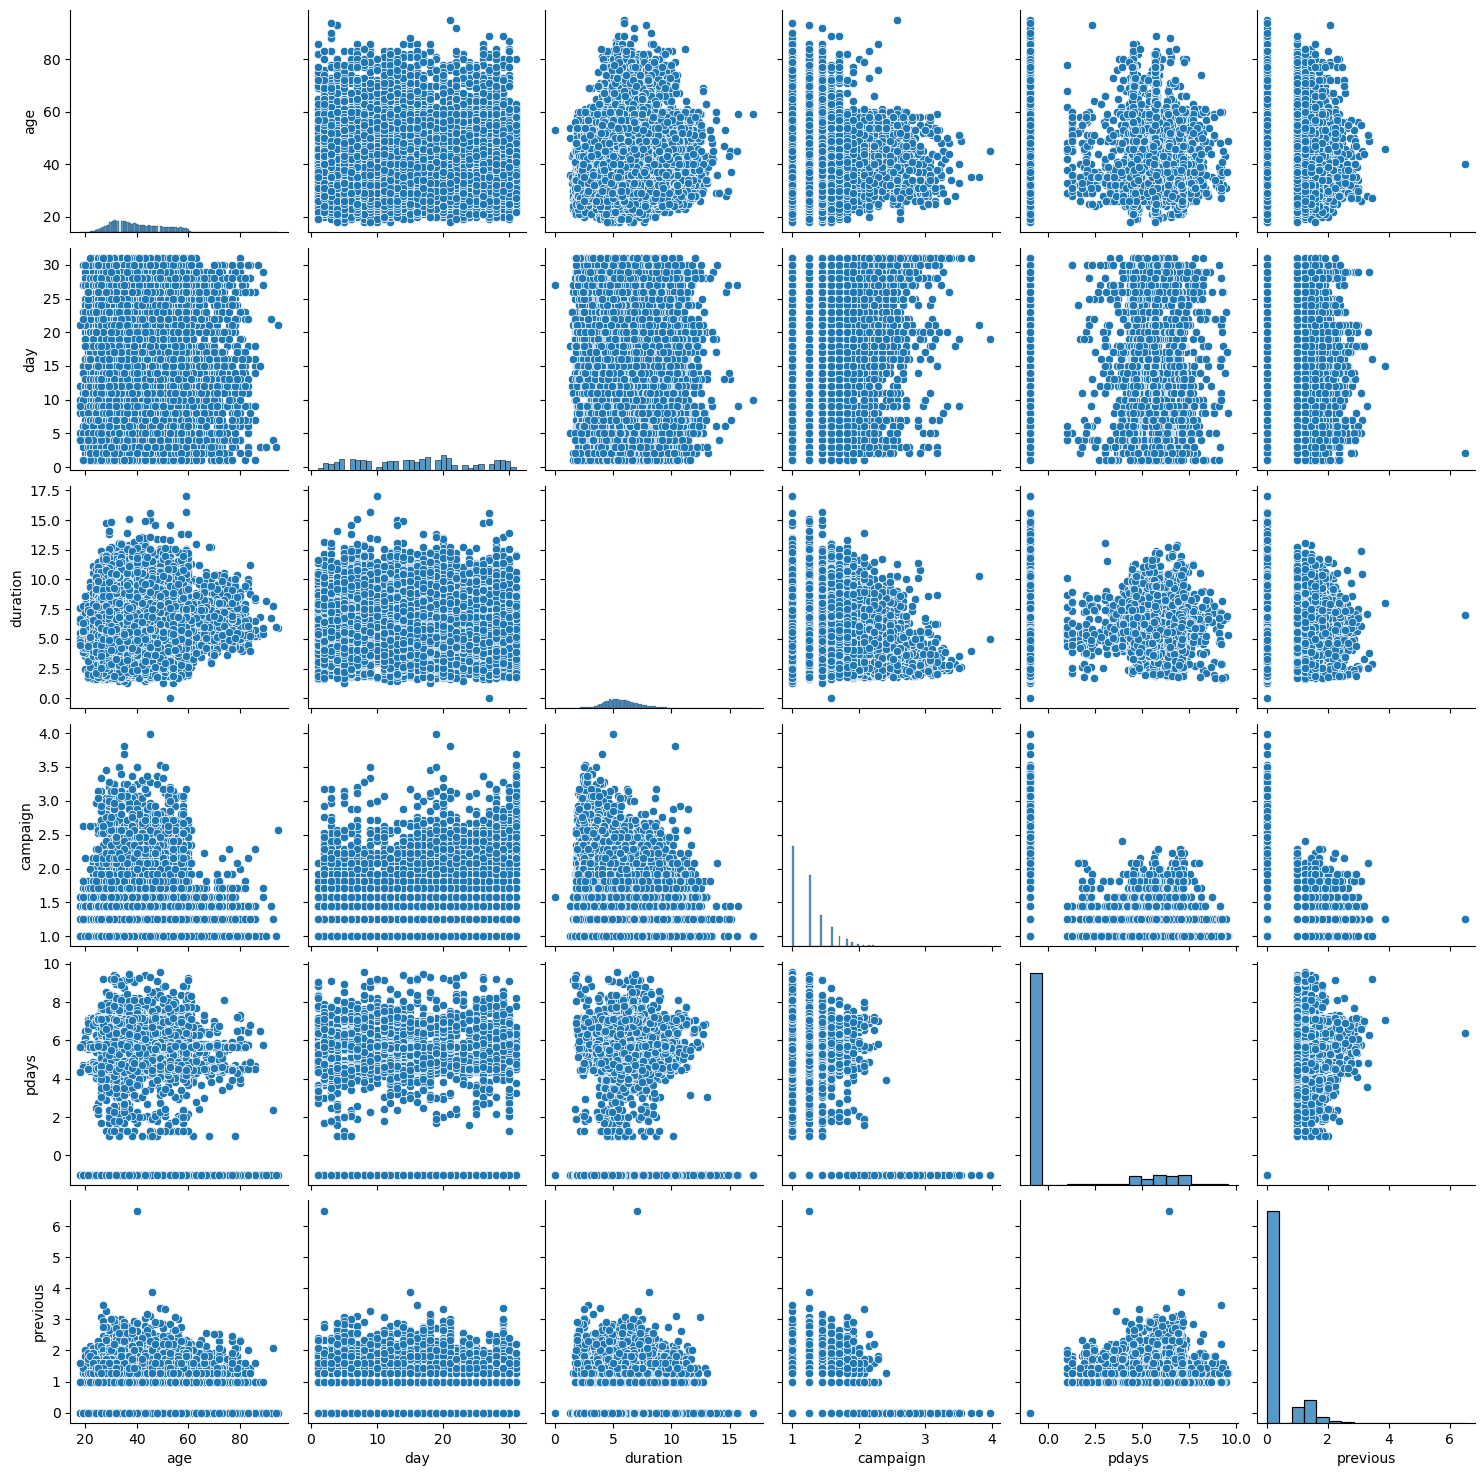

In [31]:
sns.pairplot(df)

# Encoding categorical columns

In [32]:
#Encoding categorical columns using ordinal encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,0,0,1,19,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,31,11,1,1,0,0,0,0,20,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,27,7,1,1,0,1,0,0,18,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,57,4,0,2,0,0,0,0,22,6,9.535417,1.000000,4.379519,1.442250,2,1
4,31,9,1,1,0,1,0,0,4,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,12,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,53,4,0,2,0,0,1,0,5,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,32,4,2,2,0,0,0,0,7,1,3.332222,1.442250,-1.000000,0.000000,3,0
31645,57,9,1,1,0,1,0,1,15,8,2.802039,1.912931,6.958943,2.289428,0,0


# Removing the outliers

In [33]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [34]:
threshold=3
print(np.where(z>3))

(array([   10,    21,   109, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 11,  4, ...,  0, 13, 10], dtype=int64))


In [35]:
df1=df[(z<3).all(axis=1)]

In [36]:
#Shape of dataset before removing outliers
df.shape

(31647, 16)

In [37]:
#Shape after removing outliers
df1.shape

(29421, 16)

In [38]:
#Checking the correlation 
df.corr()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.008672,0.016974,-0.007257,0.004836,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.001740,0.004734,-0.007784,0.000043,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.013765,-0.020674,0.025247,0.026130,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.002867,-0.001402,0.020848,0.029767,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.009781,0.018914,-0.036851,-0.036702,0.035067,-0.020168
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,1.000000,0.036244,0.195103,-0.025666,0.271442,0.001012,-0.033177,0.081725,0.053207,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.011323,0.006838,-0.025042,-0.025072,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.032611,0.014552,-0.281906,-0.273055,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.052736,0.164516,-0.084394,-0.078785,0.077586,-0.029600
month,-0.038368,-0.089384,-0.003834,-0.055967,0.004694,0.271442,0.024186,0.362934,-0.000604,1.000000,0.005335,-0.132575,0.028869,0.032273,-0.029369,-0.028088


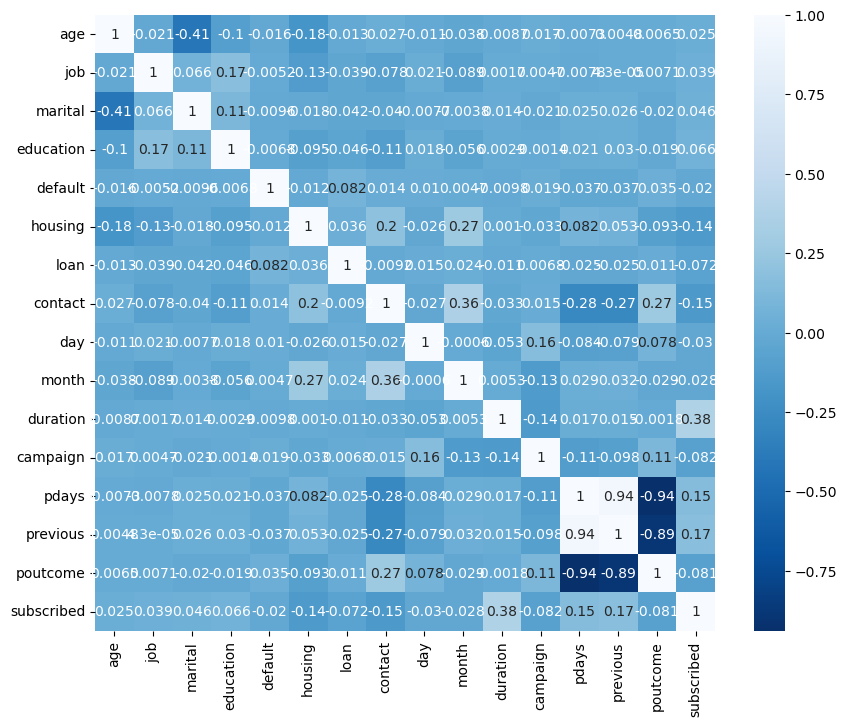

In [39]:
#Let's visualize it using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')
plt.show()

In [40]:
#Separating the target and independent variables into x and y
x=df1.drop('subscribed',axis=1)
y=df1['subscribed']

In [41]:
#Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.521607,-1.317638,-0.282119,2.378646,0.0,-1.128949,-0.435588,0.388090,0.392858,1.152991,-1.399318,-0.060014,-0.444405,-0.441416,0.425627
1,-0.955869,2.033260,-0.282119,-0.303998,0.0,-1.128949,-0.435588,-0.717876,0.513370,-0.181843,-0.812880,-0.060014,-0.444405,-0.441416,0.425627
2,-1.352265,0.814752,-0.282119,-0.303998,0.0,0.885779,-0.435588,-0.717876,0.272345,-0.181843,0.227471,-0.943319,-0.444405,-0.441416,0.425627
3,1.620706,-0.099130,-1.931604,1.037324,0.0,-1.128949,-0.435588,-0.717876,0.754396,0.151865,2.240234,-0.943319,1.615025,2.515667,-0.612197
4,-0.955869,1.424006,-0.282119,-0.303998,0.0,0.885779,-0.435588,-0.717876,-1.414834,-0.849261,0.850940,-0.943319,-0.444405,-0.441416,0.425627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29416,0.233319,-0.099130,1.367367,-0.303998,0.0,-1.128949,-0.435588,1.494056,0.513370,0.151865,-1.655760,1.052880,-0.444405,-0.441416,0.425627
29417,-0.361275,1.424006,1.367367,1.037324,0.0,-1.128949,-0.435588,1.494056,-1.173809,0.151865,1.077769,-0.060014,-0.444405,-0.441416,0.425627
29418,-1.154067,-0.099130,1.367367,1.037324,0.0,0.885779,-0.435588,-0.717876,-0.450732,0.819282,-0.583140,-0.060014,-0.444405,-0.441416,0.425627
29419,1.224310,-0.099130,-1.931604,1.037324,0.0,-1.128949,2.295748,-0.717876,-1.294321,0.151865,1.063800,-0.060014,-0.444405,-0.441416,0.425627


In [42]:
#Finding variance inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.262322,age
1,1.050999,job
2,1.227914,marital
3,1.064375,education
4,NaN,default
5,1.182433,housing
6,1.008807,loan
7,1.331526,contact
8,1.027491,day
9,1.262906,month


we can remove default
pdays and previous are highly correlated so we can drop pdays as it is higly correlated in place of previou

In [43]:
x.drop(columns=['default','pdays'],axis=1,inplace=True)

In [44]:
x

,age,job,marital,education,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.521607,-1.317638,-0.282119,2.378646,-1.128949,-0.435588,0.388090,0.392858,1.152991,-1.399318,-0.060014,-0.441416,0.425627
1,-0.955869,2.033260,-0.282119,-0.303998,-1.128949,-0.435588,-0.717876,0.513370,-0.181843,-0.812880,-0.060014,-0.441416,0.425627
2,-1.352265,0.814752,-0.282119,-0.303998,0.885779,-0.435588,-0.717876,0.272345,-0.181843,0.227471,-0.943319,-0.441416,0.425627
3,1.620706,-0.099130,-1.931604,1.037324,-1.128949,-0.435588,-0.717876,0.754396,0.151865,2.240234,-0.943319,2.515667,-0.612197
4,-0.955869,1.424006,-0.282119,-0.303998,0.885779,-0.435588,-0.717876,-1.414834,-0.849261,0.850940,-0.943319,-0.441416,0.425627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29416,0.233319,-0.099130,1.367367,-0.303998,-1.128949,-0.435588,1.494056,0.513370,0.151865,-1.655760,1.052880,-0.441416,0.425627
29417,-0.361275,1.424006,1.367367,1.037324,-1.128949,-0.435588,1.494056,-1.173809,0.151865,1.077769,-0.060014,-0.441416,0.425627
29418,-1.154067,-0.099130,1.367367,1.037324,0.885779,-0.435588,-0.717876,-0.450732,0.819282,-0.583140,-0.060014,-0.441416,0.425627
29419,1.224310,-0.099130,-1.931604,1.037324,-1.128949,2.295748,-0.717876,-1.294321,0.151865,1.063800,-0.060014,-0.441416,0.425627


In [45]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 29421, dtype: int32

# Creating the train test split

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
x_train.shape

(23536, 13)

In [50]:
x_test.shape

(5885, 13)

In [51]:
y_train.shape

(23536,)

In [52]:
y_test.shape

(5885,)

# Checking the accuracy for RandomForestClassifier

In [55]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9038232795242142
[[5082  148]
 [ 418  237]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5230
           1       0.62      0.36      0.46       655

    accuracy                           0.90      5885
   macro avg       0.77      0.67      0.70      5885
weighted avg       0.89      0.90      0.89      5885



# Checking for Extra Trees Classifier

In [56]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9009345794392524
[[5100  130]
 [ 453  202]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5230
           1       0.61      0.31      0.41       655

    accuracy                           0.90      5885
   macro avg       0.76      0.64      0.68      5885
weighted avg       0.88      0.90      0.89      5885



# Checking for Gradient Boosting Classifier

In [57]:
GTR=GradientBoostingClassifier()
GTR.fit(x_train,y_train)
predGTR=GTR.predict(x_test)
print(accuracy_score(y_test,predGTR))
print(confusion_matrix(y_test,predGTR))
print(classification_report(y_test,predGTR))

0.9051826677994902
[[5089  141]
 [ 417  238]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5230
           1       0.63      0.36      0.46       655

    accuracy                           0.91      5885
   macro avg       0.78      0.67      0.70      5885
weighted avg       0.89      0.91      0.89      5885



# Logistic Regression

In [58]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9014443500424809
[[5096  134]
 [ 446  209]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5230
           1       0.61      0.32      0.42       655

    accuracy                           0.90      5885
   macro avg       0.76      0.65      0.68      5885
weighted avg       0.88      0.90      0.89      5885



# Support Vector Classifier

In [60]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9045029736618522
[[5172   58]
 [ 504  151]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5230
           1       0.72      0.23      0.35       655

    accuracy                           0.90      5885
   macro avg       0.82      0.61      0.65      5885
weighted avg       0.89      0.90      0.88      5885



# Saving the best model

In [61]:
import joblib

joblib.dump(GTR,'GTRfile.obj')

['GTRfile.obj']

In [70]:
model=joblib.load('GTRfile.obj')

prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 0, 0])

# These are the predicted subscribed value of the customer

In [67]:
y_test.shape

(5885,)

In [68]:
x_test.shape

(5885, 13)

In [71]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
5880,0,0
5881,0,0
5882,1,0
5883,0,0
